In [1]:
import pandas as pd, numpy as np, os, warnings, seaborn as sns, matplotlib.pyplot as plt, matplotlib
from datetime import datetime

warnings.simplefilter(action='ignore', category=FutureWarning) 
pd.options.mode.chained_assignment = None
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('seaborn')
sns.set_color_codes('colorblind')
matplotlib.rcParams.update({'font.size': 14}) 
matplotlib.rcParams.update({'xtick.labelsize':16})
matplotlib.rcParams.update({'ytick.labelsize':16})
matplotlib.rcParams.update({'axes.labelsize':16})
matplotlib.rcParams.update({'axes.titlesize':20})
matplotlib.rcParams.update({'legend.fontsize': 16}) 
sns.set_style('white')

In [2]:
url = '/content/Winters-Attribution-PS3.csv'
df = pd.read_csv(url)

In [3]:
df.head(5)

,Unnamed: 0,Orderid,Orderdatetime,Saleamount,Newcustomer,Position,Positiondatetime,Groupname,Networkname,Networkid,Brand,Positionname,DaysToConvert
0,1,11634052,2012-05-01 4:24,341.5,Y,1,2012-05-01 3:49,BUZZ AFFILIATE,Buzz CPA Affiliate,buzz23,N,CONVERTER,0
1,2,11634052,2012-05-01 4:24,341.5,Y,0,2012-05-01 3:47,SEARCH GOOGLE BRAND,G: Medifast Brand Terms > Medifast >,g000793,Y,ORIGINATOR,0
2,3,11634059,2012-05-01 4:08,339.0,Y,2,2012-04-29 21:01,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,CONVERTER,2
3,4,11634059,2012-05-01 4:08,339.0,Y,1,2012-04-24 5:29,CPM,Armonix,nar7467,N,ASSIST,7
4,5,11634059,2012-05-01 4:08,339.0,Y,0,2012-04-23 2:46,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,ORIGINATOR,8


In [8]:
df = df[['Orderid', 'Orderdatetime', 'Saleamount', 'Newcustomer',
       'Position', 'Positiondatetime', 'Groupname', 'Networkname', 'Networkid',
       'Brand', 'Positionname', 'DaysToConvert']]

In [9]:
print('Time range: ', df['Orderdatetime'].min(), 'to', df['Orderdatetime'].max())
print('Number of touchpoints:', len(df))
print('Number of orders:', len(df['Orderid'].unique()))
print('Number of touchpoints per order:', np.round(len(df)/len(df['Orderid'].unique()), 2))

Time range:  2012-05-01 10:04 to 2012-06-01 3:45
Number of touchpoints: 7624
Number of orders: 1627
Number of touchpoints per order: 4.69


In [10]:
df.Positionname.unique()

array(['CONVERTER', 'ORIGINATOR', 'ASSIST', 'ROSTER'], dtype=object)

**Q1. (30 pts) Compare first-touch vs. last-touch attribution models**

**a) (10 pts) What is the number of orders attributed to each channel using a last-touch model? What about the number of orders attributed to each channel using a first-touch model? What is the corresponding share of credit from the two attribution models?** 

In [31]:
# calculating the count per channel by last touch
num_order = len(df['Orderid'].unique())
T_last_count = pd.DataFrame(df.loc[df['Positionname']=='CONVERTER', 
                             'Groupname'].value_counts()).reset_index().sort_values('index')
np.round(T_last_count,3)

,index,Groupname
1,BUZZ AFFILIATE,486
2,CJ,224
0,CPM,830
7,OTHER,3
8,PRINT - MAGAZINES,3
3,SEARCH GOOGLE NON-BRAND,32
6,SEARCH MSN NON-BRAND,7
5,TV,20
4,Uncategorized,22


In [32]:
# calculating the percentage per channel by last touch
num_order = len(df['Orderid'].unique())
T_last_percent = pd.DataFrame((df.loc[df['Positionname']=='CONVERTER', 
                             'Groupname'].value_counts()/num_order)*100).reset_index().sort_values('index')
np.round(T_last_percent,3)

,index,Groupname
1,BUZZ AFFILIATE,29.871
2,CJ,13.768
0,CPM,51.014
7,OTHER,0.184
8,PRINT - MAGAZINES,0.184
3,SEARCH GOOGLE NON-BRAND,1.967
6,SEARCH MSN NON-BRAND,0.430
5,TV,1.229
4,Uncategorized,1.352


In [40]:
# calculating the count per channel by first touch
num_order = len(df['Orderid'].unique())
T_first_count = pd.DataFrame(df.loc[df['Positionname']=='ORIGINATOR', 
                             'Groupname'].value_counts()).reset_index().sort_values('index')
np.round(T_first_count,3)

,index,Groupname
2,BUZZ AFFILIATE,225
4,CJ,87
0,CPM,618
11,DIRECT MAIL,1
6,OTHER,20
10,PRINT - MAGAZINES,4
1,SEARCH GOOGLE BRAND,474
5,SEARCH GOOGLE NON-BRAND,53
3,SEARCH MSN BRAND,117
9,SEARCH MSN NON-BRAND,4


In [41]:
# calculating the percentage per channel by first touch
num_order = len(df['Orderid'].unique())
T_first_percent = pd.DataFrame(df.loc[df['Positionname']=='ORIGINATOR', 
                             'Groupname'].value_counts()/num_order
                             *100).reset_index().sort_values('index')
np.round(T_first_percent,3)

,index,Groupname
2,BUZZ AFFILIATE,13.829
4,CJ,5.347
0,CPM,37.984
11,DIRECT MAIL,0.061
6,OTHER,1.229
10,PRINT - MAGAZINES,0.246
1,SEARCH GOOGLE BRAND,29.133
5,SEARCH GOOGLE NON-BRAND,3.258
3,SEARCH MSN BRAND,7.191
9,SEARCH MSN NON-BRAND,0.246


In [73]:
# merging all 4 tables 
merge_1 = np.round(pd.merge(T_last_count, T_first_count, how = 'outer', on = 'index').fillna(0).rename(
    columns={"Groupname_x": "Converter", "Groupname_y": "Originator"}), 3)

merge_2= np.round(pd.merge(T_last_percent, T_first_percent, how = 'outer', on = 'index').fillna(0).rename(
    columns={"Groupname_x": "Converter %", "Groupname_y": "Originator %"}), 5)

first_last = np.round(pd.merge(merge_1, merge_2, how = 'outer', on = 'index').fillna(0), 3)

The table below displays the number of orders and corresponding share of credit from the two attribution (first and last touch) models.

In [72]:
new_row = {'index': 'TOTAL', 'Converter': first_last.Converter.sum(), 'Originator': first_last.Originator.sum(), 'Converter %': first_last['Converter %'].sum(), 'Originator %': first_last['Originator %'].sum()}
first_last = first_last.append(new_row, ignore_index=True)
first_last

,index,Converter,Originator,Converter %,Originator %
0,BUZZ AFFILIATE,486.0,225,29.871,13.829
1,CJ,224.0,87,13.768,5.347
2,CPM,830.0,618,51.014,37.984
3,OTHER,3.0,20,0.184,1.229
4,PRINT - MAGAZINES,3.0,4,0.184,0.246
5,SEARCH GOOGLE NON-BRAND,32.0,53,1.967,3.258
6,SEARCH MSN NON-BRAND,7.0,4,0.430,0.246
7,TV,20.0,14,1.229,0.860
8,Uncategorized,22.0,9,1.352,0.553
9,DIRECT MAIL,0.0,1,0.000,0.061


**b) (10 pts) In a single bar chart, plot the share of credit (in percentage) for the first- and last touch attribution models by marketing channel.**

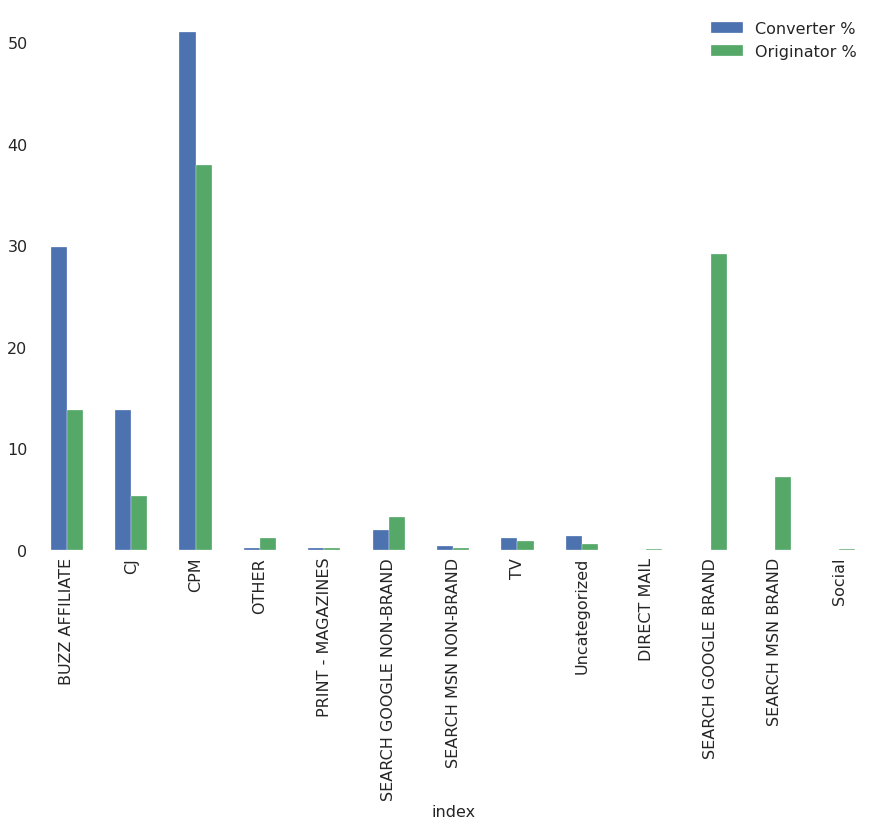

In [89]:
first_last[:13].plot(x='index', y=['Converter %', 'Originator %'], kind='bar', figsize=(15, 10))

**c) (10 pts) Compare results from the two attribution model. What would be the
consequence to Winters if it allocated its marketing budget entirely based on the lasttouch attribution model?**

The CPM channel has the share of credit when using both first and last touch attribution models (51.01% and 37.98% respectively). The Buzz Affiliates channel holds the second highest share of credit when using the last touch attribution model (29.87%), but has a significantly lower proportion of credit share for the first touch attribution model (13.83%). When customers search for google brands, the first touch attribution displays that this accounts to 29.13% of the total share of credit. The CJ channel has the third highest share of credit (13.77%) across the last touch attribution model. We note that all other channels have less than 8% of the total share of credit across both the first and last touch attribution models. This implies that CPM and Buzz Affiliates have the highest share of credits across both models, with an addition of the CJ channel's share of credit only for the last touch attribution model. 

If the marketing budget is allocated entirely based on the last touch attribution model, then Winters will not be able to account for the consumer interactions with all other touchpoints. There might be an interaction effect between all these different marketing touchpoints, which a single touch model (either first or last touch model) will fail to take into account. 

**Q2. (20 pts) Compare new customers and old customers**

**a) (5 pts) What is the average number of days that it takes for a new customer to convert (from the first touchpoint)? What is the average number of days that it takes for an old customer to convert?**

In [94]:
num_order_new = len(df[(df['Positionname']=='CONVERTER')&(df['Newcustomer'] == 'Y')])
num_order_old = len(df[(df['Positionname']=='CONVERTER')&(df['Newcustomer'] == 'N')])

In [126]:
new_firsttouchpoint = df[(df['Newcustomer'] == 'Y') & (df['Positionname'] == 'ORIGINATOR')]
new_firsttouchpoint.DaysToConvert.mean()

5.504073319755601

On average, it takes 5.5 days for a new customer to convert from the first touch point. 

In [106]:
old_firsttouchpoint = df[(df['Newcustomer'] == 'N') & (df['Positionname'] == 'ORIGINATOR')]
old_firsttouchpoint.DaysToConvert.mean()

32.010852713178295

It takes 32 days on average for an old customer to convert from the first touch point.

**b) (5 pts) What is the average number of touchpoints by new versus old customer’s orders? Hint: Use the Touches variable if available. If not, create the ‘Touches’ variable for the number of touchpoints per order. R users can use the add_count() function.**

In [155]:
new = df[df['Newcustomer'] == 'Y']
temp_new = new.groupby('Orderid')['Position'].count()
temp_new

Orderid
11634060    8
11634119    2
11635494    4
11636452    6
11637581    4
           ..
11776990    4
11777034    5
11777068    7
11777397    7
11777500    5
Name: Position, Length: 645, dtype: int64

In [163]:
temp_new.sum()/temp_new.shape[0]

4.321792260692464

In [156]:
old = df[df['Newcustomer'] == 'N']
temp_old = old.groupby('Orderid')['Position'].count()
temp_old

Orderid
11634060    8
11634119    2
11635494    4
11636452    6
11637581    4
           ..
11776990    4
11777034    5
11777068    7
11777397    7
11777500    5
Name: Position, Length: 645, dtype: int64

In [162]:
temp_old.sum()/temp_old.shape[0]

5.24031007751938

New customers on average have 4.32 touchpoints while old customers on average have 5.24 touchpoints.

**c) (5 pts) What is the average order sales amount by new versus old customer’s orders?**

In [167]:
print(new.Saleamount.mean())
print(old.Saleamount.mean())

264.26314090480633
205.5042189349092


The average order sales for new customers' orders is 264.26 USD while the average order sales for old customers' orders is 205.50 USD.

**d) (5 pts) Summarize how new and old customers differ along these three variables.**

The three variables used for the summary include the average number of days to convert, average number of touchpoints and average order sales for customers' orders. 

Old customers take approximately 27 days more to convert than new customers and they have a marginally higher number of touchpoints on average (old customers have 5.34 touchpoints on average while new customers have 4.32 touchpoints on average). However, the average order sales for new customers' is higher than that of old customers. This indicates that there might be some new customers who might be making bulk purchases, while old customers prefer to visit the site regularly to make smaller purchases. Old customers might prefer browsing on the website longer before making a purchase, which in turn leads to having more touchpoints when browsing longer on the site. 

In [164]:
T_first_new_percent = pd.DataFrame(df.loc[(df['Positionname']=='ORIGINATOR')&(df['Newcustomer'] == 'Y'), 
                'Groupname'].value_counts()/num_order_new*100).reset_index().sort_values('index')

T_first_new_count = pd.DataFrame(df.loc[(df['Positionname']=='ORIGINATOR')&(df['Newcustomer'] == 'Y'), 
                'Groupname'].value_counts()).reset_index().sort_values('index')

T_first_old_percent = pd.DataFrame(df.loc[(df['Positionname']=='ORIGINATOR')&(df['Newcustomer'] == 'N'), 
                'Groupname'].value_counts()/num_order_old*100).reset_index().sort_values('index')

T_first_old_count = pd.DataFrame(df.loc[(df['Positionname']=='ORIGINATOR')&(df['Newcustomer'] == 'N'), 
                'Groupname'].value_counts()).reset_index().sort_values('index')
                
# merging all 4 tables 
merge_1 = np.round(pd.merge(T_first_new_count, T_first_old_count, how = 'outer', on = 'index').fillna(0).rename(
    columns={"Groupname_x": "New Customers", "Groupname_y": "Old Customers"}), 3)

merge_2= np.round(pd.merge(T_first_new_percent, T_first_old_percent, how = 'outer', on = 'index').fillna(0).rename(
    columns={"Groupname_x": "New Customer Share of Credit", "Groupname_y": "Old Customer Share of Credit"}), 5)

first_last = np.round(pd.merge(merge_1, merge_2, how = 'outer', on = 'index').fillna(0), 3)
new_row = {'index': 'TOTAL', 'New Customers': first_last['New Customers'].sum(), 'Old Customers': first_last['Old Customers'].sum(), 'New Customer Share of Credit': first_last['New Customer Share of Credit'].sum(), 'Old Customer Share of Credit': first_last['Old Customer Share of Credit'].sum()}
first_last = first_last.append(new_row, ignore_index=True)
first_last

,index,New Customers,Old Customers,New Customer Share of Credit,Old Customer Share of Credit
0,BUZZ AFFILIATE,127.0,98.0,12.933,15.194
1,CJ,49.0,38.0,4.990,5.891
2,CPM,381.0,237.0,38.798,36.744
3,OTHER,6.0,14.0,0.611,2.171
4,PRINT - MAGAZINES,2.0,2.0,0.204,0.310
5,SEARCH GOOGLE BRAND,294.0,180.0,29.939,27.907
6,SEARCH GOOGLE NON-BRAND,34.0,19.0,3.462,2.946
7,SEARCH MSN BRAND,69.0,48.0,7.026,7.442
8,SEARCH MSN NON-BRAND,4.0,0.0,0.407,0.000
9,Social,1.0,0.0,0.102,0.000
